In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# <center> HELPER FUNCTION </center>

In [2]:
model = nn.Linear(10, 1)
def plot_scheduler(scheduler, epochs = 100, name = 'STEP_LR'):    
    learning_rates = []
    for epoch in range(epochs):
        scheduler.step()
        learning_rate = scheduler.get_last_lr()
        learning_rates.append(learning_rate)

    plt.plot(learning_rates)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title(f'{name} Scheduler')
    plt.show()


# <center> PLOTS </center>

/opt/conda/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


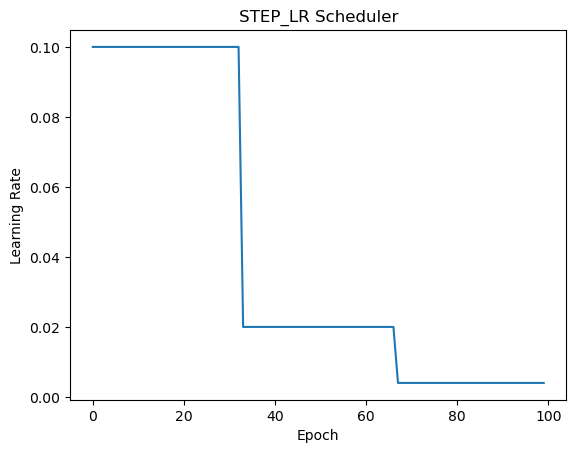

In [3]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler1 = optim.lr_scheduler.StepLR(optimizer, step_size=34, gamma=0.2)
plot_scheduler(scheduler1, epochs = 100, name = 'STEP_LR')

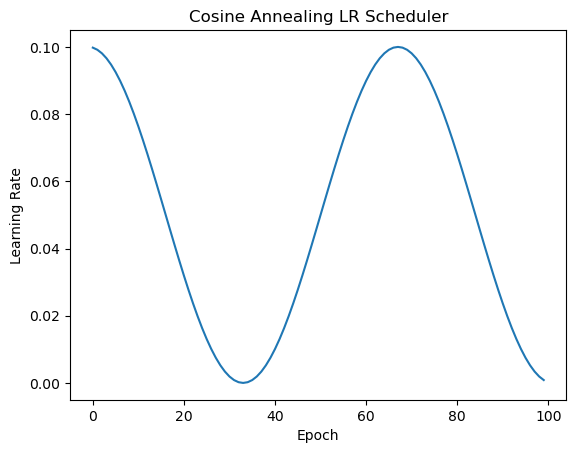

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler2 = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=34)
plot_scheduler(scheduler = scheduler2, epochs = 100, name = 'Cosine Annealing LR')

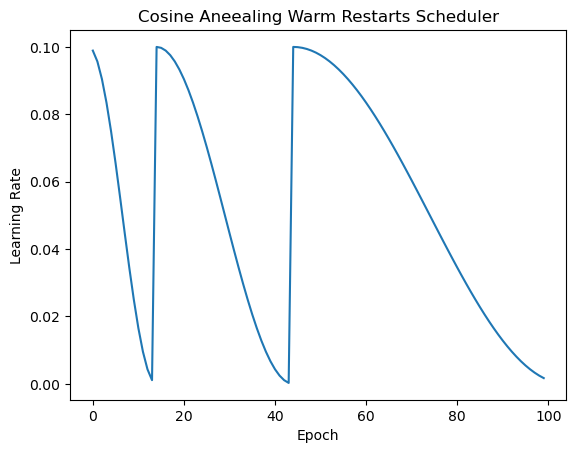

In [5]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler3 = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0 = 15, T_mult = 2)
plot_scheduler(scheduler3, epochs = 100, name = 'Cosine Aneealing Warm Restarts')

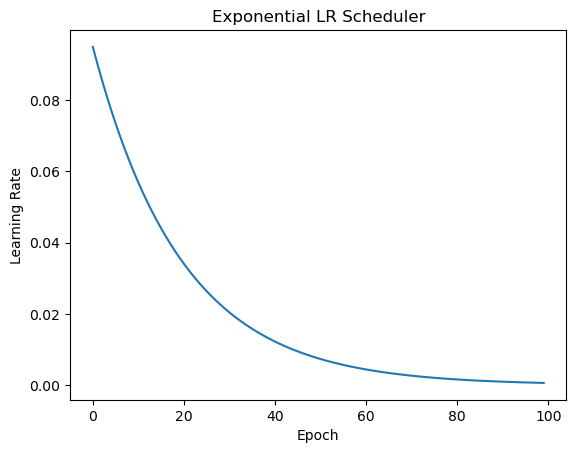

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler4 = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
plot_scheduler(scheduler4, epochs = 100, name = 'Exponential LR')

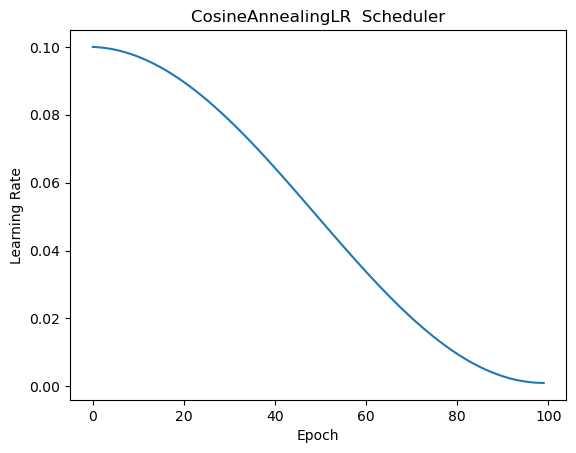

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler5 = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100, eta_min=0.001)
plot_scheduler(scheduler5, epochs = 100, name = 'CosineAnnealingLR ')

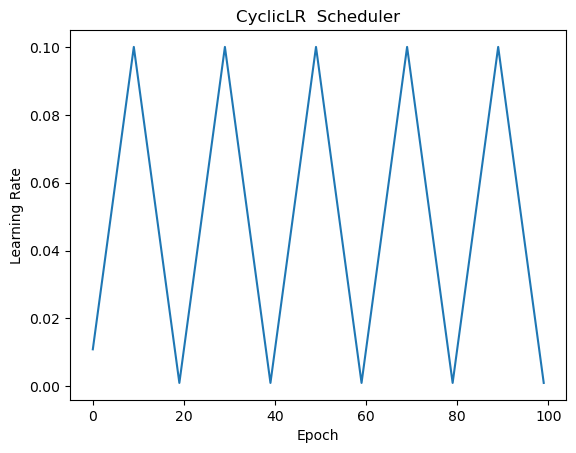

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.CyclicLR(optimizer,
                                        base_lr=0.001,
                                        max_lr=0.1,
                                        step_size_up = 10,
                                        cycle_momentum=False)
plot_scheduler(scheduler, epochs = 100, name = 'CyclicLR ')

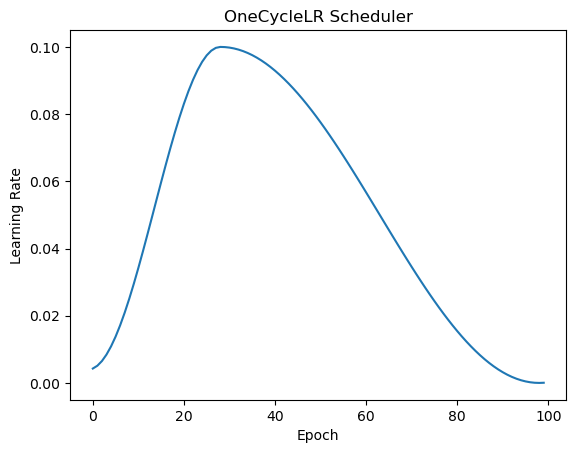

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=1, epochs=100)
plot_scheduler(scheduler, epochs = 100, name = 'OneCycleLR')